0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
0
0
0
1
0
1
1
1


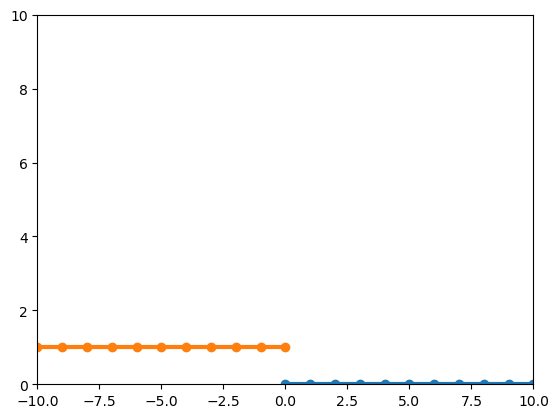

In [20]:
#TP1 Apprentissage d'un neurone d'un ensemble de points répartis
import numpy as np
import random
import matplotlib.pyplot as pyplot

#Q1 Creation du dataset pour l'entraineent du neurone.
tab_random_choice=[]
max_abscisce=10

x_zero=[]#abscisse pour la classe 0
x_un=[]#abscisse pour la classe 1
y_zero=[]#ordonnée pour la classe 0
y_un=[]#ordonnée pour la classe 1 
commencement_x_0=0
commencement_x_1=-10

for i in range(max_abscisce): #Pour la création des abscises
    classe=random.randint(0,1)
    tab_random_choice.append(classe)
    # On sauvegarde le choix dans tableau 
    for e in range(len(tab_random_choice)):
        print(str(tab_random_choice[e]))
        # Affichage aléatoire des 0 et des 1

        if(tab_random_choice[e]==0):
            x_zero.append(commencement_x_0)
            y_zero.append(tab_random_choice[e])
            commencement_x_0=commencement_x_0+1
        elif(tab_random_choice[e]==1):
            x_un.append(commencement_x_1)
            y_un.append(tab_random_choice[e])
            commencement_x_1=commencement_x_1+1

pyplot.xlim(-10,10)
pyplot.ylim(0,10)
pyplot.plot(x_zero,y_zero,"o-",label="Classe 0",linewidth=3)
pyplot.plot(x_un,y_un,"o-",label="Classe 1",linewidth=3)
pyplot.show(tab_random_choice)